# The GP-SFH module

## Creating different shapes using SFH-tuples

The `dense_basis` code contains a module for creating smooth star formation history from a tuple consisting of (M$_*$, SFR, {$t_X$}) - the stellar mass, star formation rate, and a set of lookback times at which the galaxy forms N equally spaced quantiles of its stellar mass. 

This parametrization comes with a lot of flexibility, and allows us to create a large range of SFH shapes even with a small number of parameters. Here we show a few examples, showing how we create a variety of different SFH shapes with just 2 free parameters - the SFR and the t$_{50}$. 

In [1]:
import dense_basis as db
import numpy as np
import matplotlib.pyplot as plt

Starting dense_basis. please wait ~ a minute for the FSPS backend to initialize.
Initialized stellar population with FSPS.


In [2]:
Nparam = 1
redshift = 1.0
logMstar = 10.0

Let's start with an `SFH that is rising` throughout a galaxy's lifetime, such as may be expected for high-redshift star forming galaxies. Since we are considering a galaxy with $M_* = 10^{10}M_\odot$ at z=1, we choose a reasonably high SFR of 10 $M_\odot/yr$. Since the SFR is rising, we also choose a short $t_{50}$, since it is rapidly building forming its stars. Running this through the model, we get:

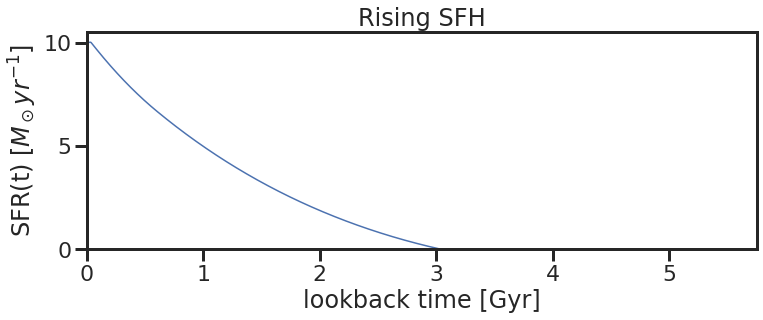

In [3]:
logSFR = 1.0
t50 = 0.6 # t50, lookback time, in Gyr

sfh_tuple = np.hstack([logMstar, logSFR, Nparam, db.scale_t50(t50,redshift)])
sfh, timeax = db.tuple_to_sfh(sfh_tuple, redshift)

fig = db.plot_sfh(timeax, sfh, lookback=True)
plt.title('Rising SFH')
plt.show()

We next consider the case of reasonably `steady star formation`. This is different from constant star formation, because SFR goes to 0 smoothly as we approach the big bang. In this case, we choose an SFR closer to the expected lifetime average for a massive galaxy at z=1, and a $t_{50}$ close to half the age of the universe at the redshift of observation. Doing this gives us:

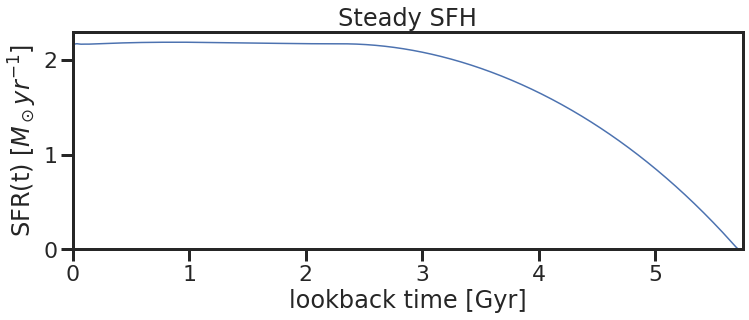

In [4]:
logSFR = 0.335
t50 = 2.3 # t50, lookback time, in Gyr

sfh_tuple = np.hstack([logMstar, logSFR, Nparam, db.scale_t50(t50,redshift)])
sfh, timeax = db.tuple_to_sfh(sfh_tuple, redshift)

fig = db.plot_sfh(timeax, sfh, lookback=True)
plt.title('Steady SFH')
plt.show()

We now look at the class of quenched and quenching galaxies. 

For the `post-starburst SFH`, we create a similar setup to the rising SFH, but with a low SFR at the time of observation. Since the galaxy still formed a lot of stars in the recent past but is not doing so now, this creates the distinctive post-starburst shape. 

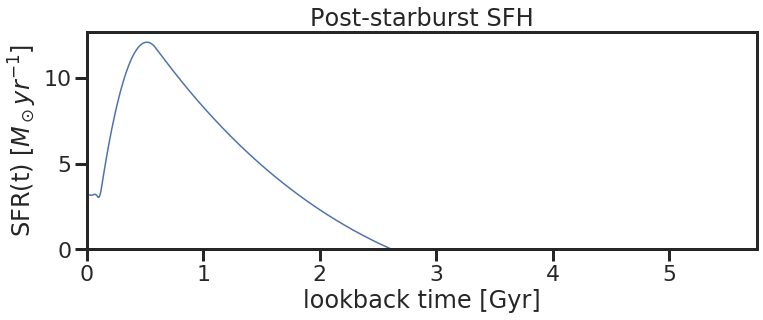

In [5]:
logSFR = 0.5
t50 = 0.6 # t50, lookback time, in Gyr

sfh_tuple = np.hstack([logMstar, logSFR, Nparam, db.scale_t50(t50,redshift)])
sfh, timeax = db.tuple_to_sfh(sfh_tuple, redshift)

fig = db.plot_sfh(timeax, sfh, lookback=True)
plt.title('Post-starburst SFH')
plt.show()

We also consider two simple types of `quenched galaxies`, obtained easily by setting the recent SFR to a very low value. To consider the different possible shapes for a quenched SFH, we use a recent and an older value for the $t_{50}$, to obtain SFHs that quenched either gradually or aburptly.

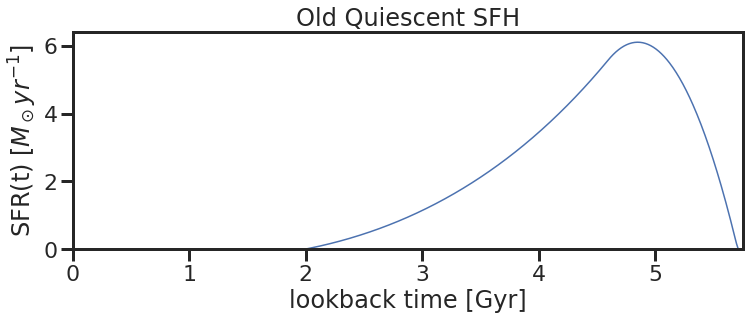

In [6]:
logSFR = -3.0
t50 = 4.6 # t50, lookback time, in Gyr

sfh_tuple = np.hstack([logMstar, logSFR, Nparam, db.scale_t50(t50,redshift)])
sfh, timeax = db.tuple_to_sfh(sfh_tuple, redshift)

fig = db.plot_sfh(timeax, sfh, lookback=True)
plt.title('Old Quiescent SFH')
plt.show()

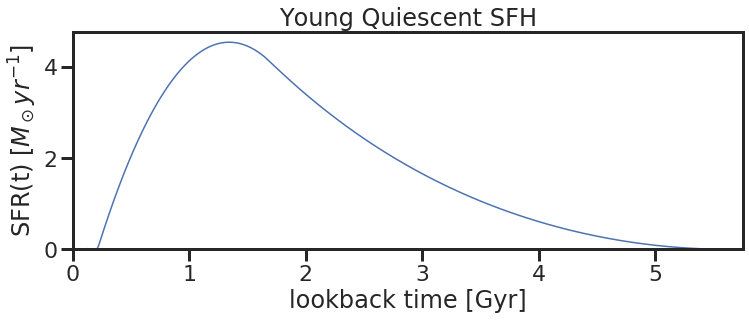

In [7]:
logSFR = -3.0
t50 = 1.7 # t50, lookback time, in Gyr

sfh_tuple = np.hstack([logMstar, logSFR, Nparam, db.scale_t50(t50,redshift)])
sfh, timeax = db.tuple_to_sfh(sfh_tuple, redshift)

fig = db.plot_sfh(timeax, sfh, lookback=True)
plt.title('Young Quiescent SFH')
plt.show()

Finally, we also consider the case of a `rejuvenated SFH`, which had a significant lull between two periods of active star formation. To create an example of this kind of SFH, we use a reasonably large $t_{50}$, which tells the GP-SFH module that the galaxy formed 50% of its stars early on. Coupled with an SFR that indicates active star formation at the time of observation, this means that there had to be a period between these two when the galaxy did not form a lot of mass, leading to this distinctive shape. 

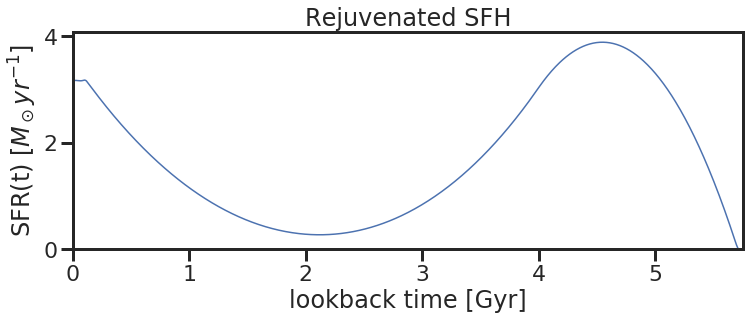

In [8]:
logSFR = 0.5
t50 = 4.0 # t50, lookback time, in Gyr

sfh_tuple = np.hstack([logMstar, logSFR, Nparam, db.scale_t50(t50,redshift)])
sfh, timeax = db.tuple_to_sfh(sfh_tuple, redshift)

fig = db.plot_sfh(timeax, sfh, lookback=True)
plt.title('Rejuvenated SFH')
plt.show()